In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

In [4]:
!pip install tensorflow


     |████████████████████████████████| 320.4 MB 20 kB/s  eta 0:00:012  |▋                               | 6.3 MB 396 kB/s eta 0:13:14     |██████▌                         | 65.6 MB 100 kB/s eta 0:42:07     |██████▋                         | 66.6 MB 328 kB/s eta 0:12:54     |███████                         | 70.8 MB 766 kB/s eta 0:05:26     |████████                        | 81.0 MB 156 kB/s eta 0:25:31     |█████████▍                      | 93.6 MB 69 kB/s eta 0:54:38     |██████████▋                     | 106.3 MB 561 kB/s eta 0:06:22     |████████████                    | 120.6 MB 679 kB/s eta 0:04:55     |████████████▎                   | 123.4 MB 827 kB/s eta 0:03:59     |████████████▋                   | 126.3 MB 708 kB/s eta 0:04:34     |█████████████                   | 130.9 MB 1.1 MB/s eta 0:02:51     |██████████████                  | 139.6 MB 107 kB/s eta 0:28:03     |██████████████▎                 | 143.2 MB 115 kB/s eta 0:25:29     |██████████████▉                 | 148.

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=e3ec2cfb99e7ac5f96963d5c9bed37fb2954028c8d0897efc221c81856630be1
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
imgloc=[]
label=[]
for dirname, _, filenames in os.walk('/home/shubham/Desktop/new projects data/project2  detect ages/data/train/Adults'):
    for filename in filenames:
        imgloc.append((os.path.join(dirname, filename)))
        label.append(0)
for dirname, _, filenames in os.walk('/home/shubham/Desktop/new projects data/project2  detect ages/data/train/Teenagers'):
    for filename in filenames:
        imgloc.append((os.path.join(dirname, filename)))
        label.append(1)
for dirname, _, filenames in os.walk('/home/shubham/Desktop/new projects data/project2  detect ages/data/train/Toddler'):
    for filename in filenames:
        imgloc.append((os.path.join(dirname, filename)))
        label.append(2)


In [5]:
import cv2
img=[]
for i in range(0, len(imgloc)):
    img1 = cv2.imread(imgloc[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(128,128))
    img.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [8]:
df = pd.read_csv('/home/shubham/Desktop/new projects data/project2  detect ages/data/Test.csv')
id_test = df['Filename']

In [10]:
imgloc2=[]
for dirname, _, filenames in os.walk('/home/shubham/Desktop/new projects data/project2  detect ages/data/test'):
    for filename in filenames:
        imgloc2.append((os.path.join(dirname, filename)))

In [11]:
imgx=[]
for i in range(0, len(imgloc2)):
    img1 = cv2.imread(imgloc2[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(128,128))
    imgx.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [15]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1),activation='tanh',input_shape=img[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [16]:
import keras
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])


In [17]:
history = model.fit(np.array(img), np.array(label), batch_size=10, epochs=30, verbose=1)

Epoch 1/30
281/281 [==============================] - 83s 295ms/step - loss: 2.0050 - accuracy: 0.3186
Epoch 2/30
281/281 [==============================] - 85s 302ms/step - loss: 1.2903 - accuracy: 0.3364
Epoch 3/30
281/281 [==============================] - 81s 289ms/step - loss: 1.1707 - accuracy: 0.3218
Epoch 4/30
281/281 [==============================] - 82s 290ms/step - loss: 1.1371 - accuracy: 0.3475
Epoch 5/30
281/281 [==============================] - 82s 292ms/step - loss: 1.1240 - accuracy: 0.3364
Epoch 6/30
281/281 [==============================] - 84s 298ms/step - loss: 1.1158 - accuracy: 0.3482
Epoch 7/30
281/281 [==============================] - 85s 303ms/step - loss: 1.1104 - accuracy: 0.3382
Epoch 8/30
281/281 [==============================] - 82s 291ms/step - loss: 1.1051 - accuracy: 0.3546
Epoch 9/30
281/281 [==============================] - 80s 286ms/step - loss: 1.1095 - accuracy: 0.3521
Epoch 10/30
281/281 [==============================] - 80s 285ms/step - l

In [18]:
pre=[]
pred = model.predict(np.array(np.array(imgx)))
for i in range(0,len(imgx)):
    p=pred[i][0]
    tmp=0
    for j in range(0,3):
        if pred[i][j]>p:
            p=pred[i][j]
            tmp=j
    pre.append(tmp)

In [19]:
final=[]
for i in range(len(pre)):
    if(pre[i]==0): final.append('Adults')
    elif(pre[i]==1): final.append('Teenagers')
    else: final.append('Toddler')

In [26]:
df3 = pd.DataFrame()
df3['Filename'] = id_test
df3['Category'] = final
df3.to_csv('/home/shubham/Desktop/file.csv', sep=',',index=True)

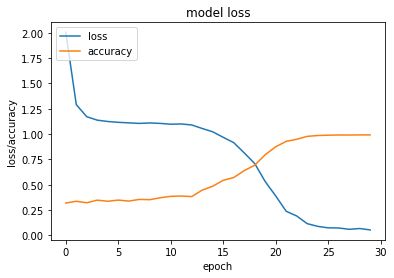

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()